In [104]:
#Obeservations:
#--Urban has much higher demands for drivers/rides
#--rural's rides has longer distance and not centralized
#--suburban has higher demands than rural area

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [35]:
#city_data.csv
#ride_data.csv
cityfile= "city_data.csv"
ridefile= "ride_data.csv"

city_df = pd.read_csv(cityfile)
city_df.head()
city_df = city_df.drop_duplicates()
#city_df["city"].value_counts() #126
#city_df.head(100)

In [4]:
ride_df=pd.read_csv(ridefile)
ride_df.head()
ride_df=ride_df.drop_duplicates()
#total number of cities
ride_df["city"].count()

2375

In [5]:
merged_df=ride_df.merge(city_df, on="city")
merged_groupbyed=merged_df.groupby("type")

In [36]:
merged_df.head()
urban_df = merged_df[merged_df['type'] == 'Urban']
#urban_df

#fare sum by city ###85 to 1000
urban_summary=pd.DataFrame()
urban_summary["farebycity"]=urban_df.groupby(["city"])["fare"].sum()
#farebycity_urban=farebycity()
#bycity_df.head()

#total number of rides per city
urban_summary["ridesbycity"]=urban_df.groupby(["city"])["ride_id"].count()

#average fare $ per city
urban_summary["averagefare"]=urban_summary["farebycity"]/urban_summary["ridesbycity"]

#total number of driver per city
urban_summary["totaldrivers"] = urban_df.groupby(["city"])["driver_count"].sum()
#total_drivers_city.reset_index()
#urban_summary.reset_index()
#urban_summary.head(20)



In [37]:
suburban_df=merged_df[merged_df['type']=='Suburban']
#suburban_df.head()

#fare sum by city ###85 to 1000
suburban_summary=pd.DataFrame()
suburban_summary["farebycity"]=suburban_df.groupby(["city"])["fare"].sum()
#farebycity_urban=farebycity()
#bycity_df.head()

#total number of rides per city
suburban_summary["ridesbycity"]=suburban_df.groupby(["city"])["ride_id"].count()

#average fare $ per city
suburban_summary["averagefare"]=suburban_summary["farebycity"]/suburban_summary["ridesbycity"]

#total number of driver per city
suburban_summary["totaldrivers"] = suburban_df.groupby(["city"])["driver_count"].sum()
#total_drivers_city.reset_index()
#urban_summary.reset_index()
#suburban_summary.head(20)

In [38]:
rural_df=merged_df[merged_df['type']=='Rural']

#fare sum by city ###85 to 1000
rural_summary=pd.DataFrame()
rural_summary["farebycity"]=rural_df.groupby(["city"])["fare"].sum()
#farebycity_urban=farebycity()
#bycity_df.head()

#total number of rides per city
rural_summary["ridesbycity"]=rural_df.groupby(["city"])["ride_id"].count()

#average fare $ per city
rural_summary["averagefare"]=rural_summary["farebycity"]/rural_summary["ridesbycity"]

#total number of driver per city
rural_summary["totaldrivers"] = rural_df.groupby(["city"])["driver_count"].sum()
#total_drivers_city.reset_index()
#urban_summary.reset_index()
#rural_summary.head(20)

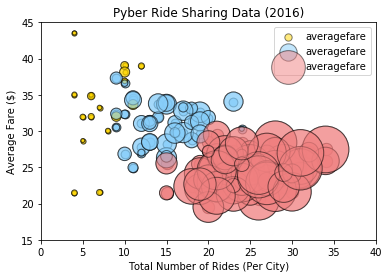

In [44]:
x_limit=40
x_axis = rural_summary["ridesbycity"]
data = rural_summary["averagefare"]
size = rural_summary["totaldrivers"]
rural_handle= plt.scatter(x_axis, data, marker='o', facecolors="gold", edgecolors="black", s=size, alpha=0.50)
plt.ylim(15 , 45)
plt.xlim(0, x_limit)

x_limit=40
x_axis = suburban_summary["ridesbycity"]
data = suburban_summary["averagefare"]
size = suburban_summary["totaldrivers"]
suburban_handle= plt.scatter(x_axis, data, marker='o', facecolors="lightskyBlue", edgecolors="black", s=size, alpha=0.50)
plt.ylim(15 , 45)
plt.xlim(0, x_limit)

x_limit=40
x_axis = urban_summary["ridesbycity"]
data = urban_summary["averagefare"]
size = urban_summary["totaldrivers"]
urban_handle= plt.scatter(x_axis, data, marker='o', facecolors="lightCoral", edgecolors="black", s=size, alpha=0.50)
plt.ylim(15 , 45)
plt.xlim(0, x_limit)

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.legend(handles=[rural_handle,suburban_handle, urban_handle ], loc="upper right" )

plt.show()


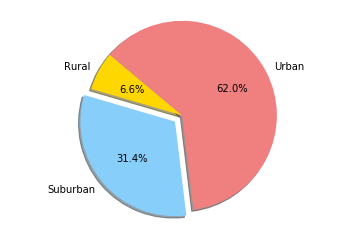

In [100]:
#% of total fares by city type

fare_citytype= merged_groupbyed["fare"].sum()
#merged_df.head(100)
#fare_citytype
fare_percent_type = (fare_citytype/merged_df["fare"].sum())*100
fare_percent_type
#pie chart
labels=["Rural","Suburban","Urban"]
colors=["Gold", "lightskyBlue", "lightCoral"]
explode=(0, 0.1,0)

plt.pie(fare_percent_type, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

In [38]:
merged_df.head()


,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


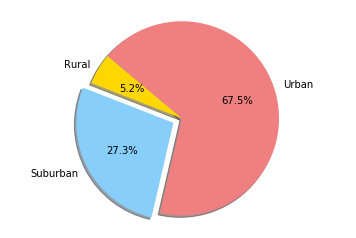

In [101]:
#% of total rides by city type
rides_citytype=merged_groupbyed["ride_id"].count()
#rides_citytype
total_rides = merged_df["ride_id"].count()
#total_rides
ride_percent_bytype=(rides_citytype/total_rides)*100
ride_percent_bytype

#pie chart
labels=["Rural","Suburban","Urban"]
colors=["Gold", "lightskyBlue", "lightCoral"]
explode=(0, 0.1,0)

plt.pie(ride_percent_bytype, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

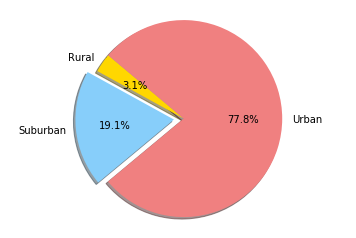

In [102]:
#% of total drivers by city type

#total driver count : 
total_drivers=city_df["driver_count"].sum()
total_drivers

#driver counts by city type
driver_citytype=city_df.groupby("type")["driver_count"].sum()
driver_citytype

#%
#driver_percent_type=[]
driver_percent_type=(driver_citytype/total_drivers)*100
driver_percent_type
#print(driver_percent_type["Rural"])

#pie chart
labels=["Rural","Suburban","Urban"]
colors=["Gold", "lightskyBlue", "lightCoral"]
explode=(0, 0.1,0)

plt.pie(driver_percent_type, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.show()
